# <center> Web Scraping Glassdoor - Exploring the Data Science Job Market</center>

### Background
As a career changer, my insight into the data science job market is somewhat limited. Although it was named [the sexiest job of the 21st century](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century) in 2012, what does that mean in terms of job prospects in 2021? Therefore I wanted to do my own analysis into the data science job market. Though there many job ssearch engines, I decided to focus on Glassdoor as they provide a detailed overview on each company, as well as salary and benefits information.

## Motivation
In this project, I scraped Glassdoor using BeautifulSoup and performed exploratory data analysis to answer the following questions:
- Which states and subsequent cities have the highest number of available data science-related positions?
- What is the average salary of data science-related positions per state?
- Which industries are offering more jobs? Which industries have highest mean salaries?
- Which companies are hiring most?
- Does Glassdoor rating have anything to do with salary?
- Which job positions are mentioned the most?
- What kind of jobs are being offered - full time, part time, contract, temporary?
- What are the minimal as well as highest educational levels required for these positions?
- Which computational skills are most sought after?

## Dataset
The dataset contains 4768 job postings that the query of "data scientist" from Glassdoor. It was obtained using BeautifulSoup, which first extracted job listing links from the result page to individual job listing pages, and then from each job listing page, it extracted the necessary features I wanted:

- **Company** - The name of the employer, _string_
- **Rating** - The employer's overall rating, _int64_
- **Role** - The title of the position _string_
- **Location** - The location of the position, _string_
- **Salary** - The employer's estimated base salary range, _string_
- **JobType** - The type of employment, e.g. full-time, part-time _string_
- **JobFunction** - The overarching function of the position, _string_
- **Industry** - The industry of the employer, _string_
- **Size** - The size of the company _string_ 
- **url** - The link url to the job positing, _string_
- **Description** - The job description which includes education and skill requirements, _string_

## Data Wrangling

In [2]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("glassdoor.csv")

In [4]:
print(df.shape)
df.head(5)

(4768, 13)


,Unnamed: 0,Company,Rating,Role,Location,State,Salary,JobType,JobFunction,Industry,Size,url,Description
0,0,United Therapeutics,4.3,Product Development Scientist,"Research Triangle Park, NC",NC,NaN,Full-time,materials scientist,Biotech & Pharmaceuticals,501 to 1000 Employees,https://www.glassdoor.com/partner/jobListing.h...,Responsible for working with a PD manager and ...
1,1,Accenture,4.1,Core Compete Data Engineer,"Raleigh, NC",NC,NaN,Full-time,data engineer,Business Services,10000+ Employees,https://www.glassdoor.com/partner/jobListing.h...,"Work with Retail, Manufacturing, Pharmaceutica..."
2,2,"Spangler Environmental, Inc.",NaN,Senior Environmental Scientist - Land and Wate...,"Raleigh, NC",NC,NaN,Full-time,environmental scientist,NaN,NaN,https://www.glassdoor.com/partner/jobListing.h...,Perform delineations of wetlands and waters pu...
3,3,Infinia ML,4.5,Data Scientist,"Durham, NC",NC,NaN,Full-time,data scientist,Information Technology,1 to 50 Employees,https://www.glassdoor.com/partner/jobListing.h...,"Developing and evaluating statistical models, ..."
4,4,Sciome LLC,NaN,Cheminformatics Scientist,"Research Triangle Park, NC",NC,NaN,Full-time,research scientist,NaN,NaN,https://www.glassdoor.com/partner/jobListing.h...,Provide computational toxicology and cheminfor...


## Data Cleaning

In [5]:
df = df.loc[:,'Company':]

In [6]:
df['City'] = df['Location'].str.split(',').str[0]
df.sample(5)

,Company,Rating,Role,Location,State,Salary,JobType,JobFunction,Industry,Size,url,Description,City
4327,Dow Jones,3.8,"Data Scientist, Barron's Group","New York, NY",NY,NaN,Full-time,data scientist,Media,5001 to 10000 Employees,https://www.glassdoor.com/partner/jobListing.h...,Serve as a key contributor and strategic lead ...,New York
1486,The Urban Institute,3.7,"Senior Data Scientist, Racial Equity Analytics","Washington, DC",DC,NaN,Full-time,data scientist,Non-Profit,501 to 1000 Employees,https://www.glassdoor.com/partner/jobListing.h...,Conduct research that explores methods to harn...,Washington
295,Vensure Employer Services,3.4,Report Writer/Data Analyst,"Chandler, AZ",AZ,NaN,Full-time,journalist,Business Services,501 to 1000 Employees,https://www.glassdoor.com/partner/jobListing.h...,Gather information from the client and determi...,Chandler
2716,Medtronic,4.1,Data Scientist,"Northridge, CA",CA,NaN,Full-time,data scientist,Biotech & Pharmaceuticals,10000+ Employees,https://www.glassdoor.com/partner/jobListing.h...,"Help develop, optimize, and validate classific...",Northridge
526,Brook Inc.,3.9,Business Intelligence Analyst,"Seattle, WA",WA,NaN,Full-time,bi analyst,Information Technology,1 to 50 Employees,https://www.glassdoor.com/partner/jobListing.h...,"Evaluate BI tools, practices and reports to id...",Seattle


In [7]:
df[['SalaryLow', 'SalaryHigh']] = df['Salary'].str.split(' - ', 1, expand=True)

In [8]:
df["SalaryLow"] = df['SalaryLow'].str.replace("$", "")
df["SalaryLow"] = df['SalaryLow'].str.replace(",", "")
df["SalaryHigh"] = df['SalaryHigh'].str.replace("$", "")
df["SalaryHigh"] = df['SalaryHigh'].str.replace(",", "")

In [9]:
df['Rating'] = pd.to_numeric(df['Rating'])
df['SalaryLow'] = pd.to_numeric(df['SalaryLow'])
df['SalaryHigh'] = pd.to_numeric(df['SalaryHigh'])

In [10]:
df.loc[(pd.isnull(df.SalaryHigh)), 'SalaryHigh'] = df.SalaryLow

In [11]:
df['SalaryMid']=(df['SalaryLow']+df['SalaryHigh'])/2

## Exploratory Data Analysis

### Missing data

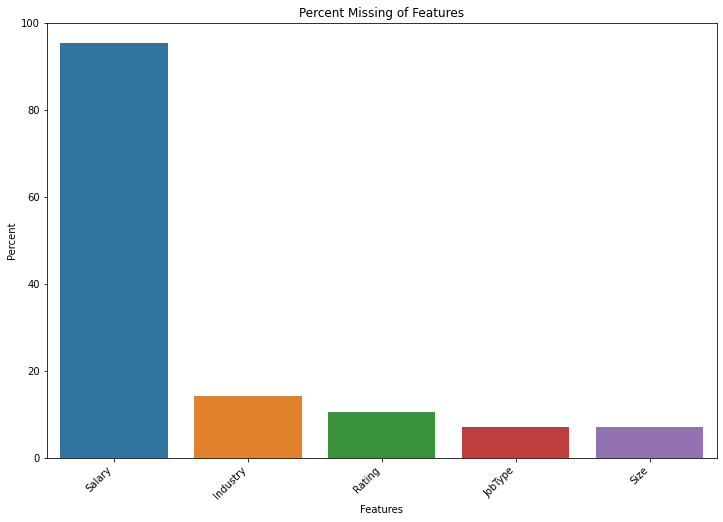

In [143]:
total = df.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((df.isnull().sum(axis=0)/df2.isnull().count(axis=0))*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])
missing_data[missing_data.Total>0]

missing_data_ = missing_data[missing_data.Total>0]

plt.figure(figsize = (12,8))
sns.barplot(x = missing_data_.index, y = missing_data_['Percent'])
plt.xlabel('Features')
plt.ylabel('Percent')
plt.title('Percent Missing of Features')
plt.xticks(
    rotation=45, 
    horizontalalignment='right')
plt.show()

In [144]:
missing_data

,Total,Percent
Salary,4543,95.281040
Industry,679,14.240772
Rating,497,10.423658
JobType,338,7.088926
Size,336,7.046980


### State

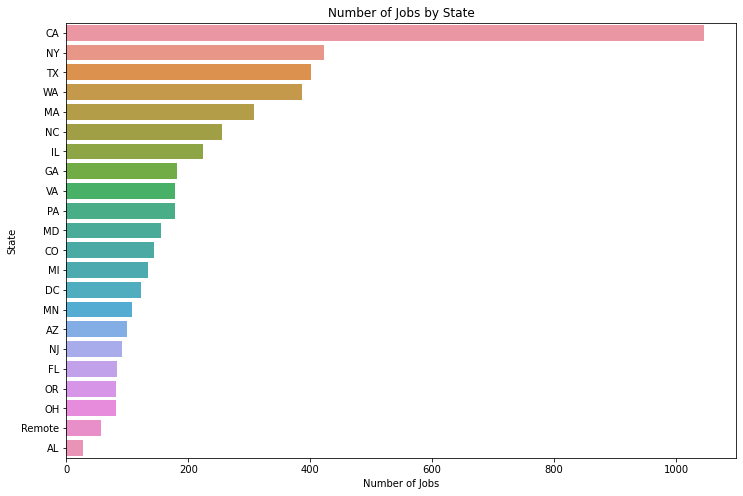

In [98]:
plt.figure(figsize = (12,8))
sns.barplot(x = df.State.value_counts().values, y = df.State.value_counts().index)
plt.title("Number of Jobs by State")
plt.xlabel('Number of Jobs')
plt.ylabel("State");

### Citywise

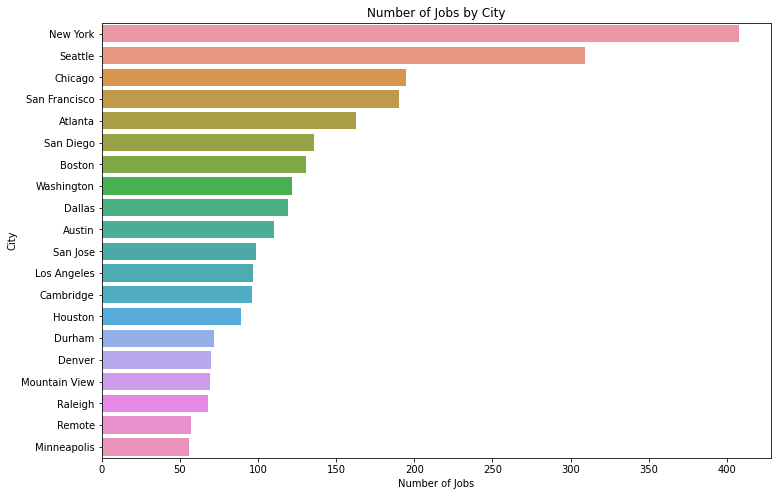

In [96]:
plt.figure(figsize = (12,8))
sns.barplot(x = df.City.value_counts().values[:20], y = df.City.value_counts().index[:20])
plt.title("Number of Jobs by City")
plt.xlabel('Number of Jobs')
plt.ylabel("City")
plt.show()

### State vs Salary

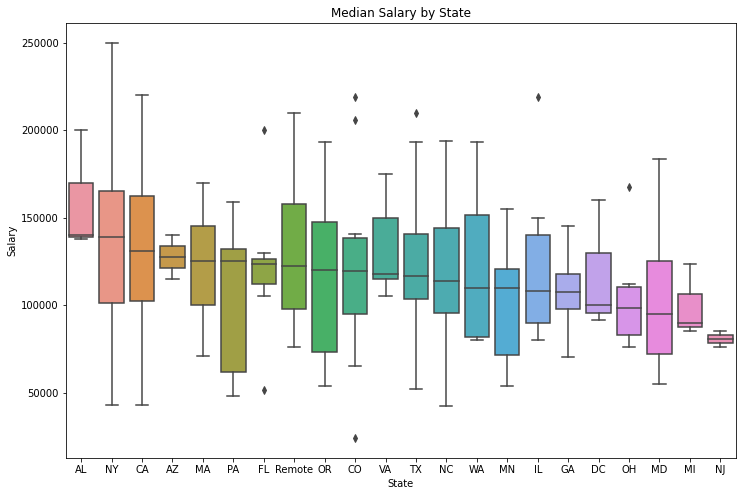

In [94]:
state_salary=df.groupby(['State'])['SalaryMid'].median().sort_values(ascending=False).index

plt.figure(figsize = (12,8))
sns.boxplot(x='State', y='SalaryMid', data = df, order=state_salary)
plt.xlabel("State")
plt.ylabel("Salary")
plt.title("Median Salary by State")
plt.show()

In [16]:
df[(df.State=='AL')&(df.SalaryMid.notnull())].shape[0]

3

In [17]:
df[(df.State=='NY')&(df.SalaryMid.notnull())].shape[0]

12

In [18]:
df[(df.State=='CA')&(df.SalaryMid.notnull())].shape[0]

48

### Industry

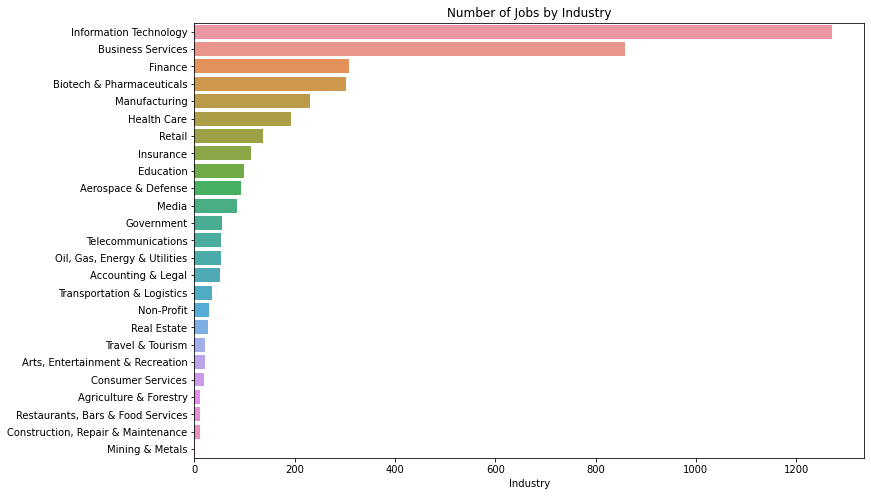

In [100]:
plt.figure(figsize = (12,8))
sns.barplot(x=df.Industry.value_counts().values, y=df.Industry.value_counts().index) #top ten sectors
plt.title("Number of Jobs by Industry")
plt.xlabel('Number of Jobs')
plt.xlabel('Industry');

### Industry vs Salary

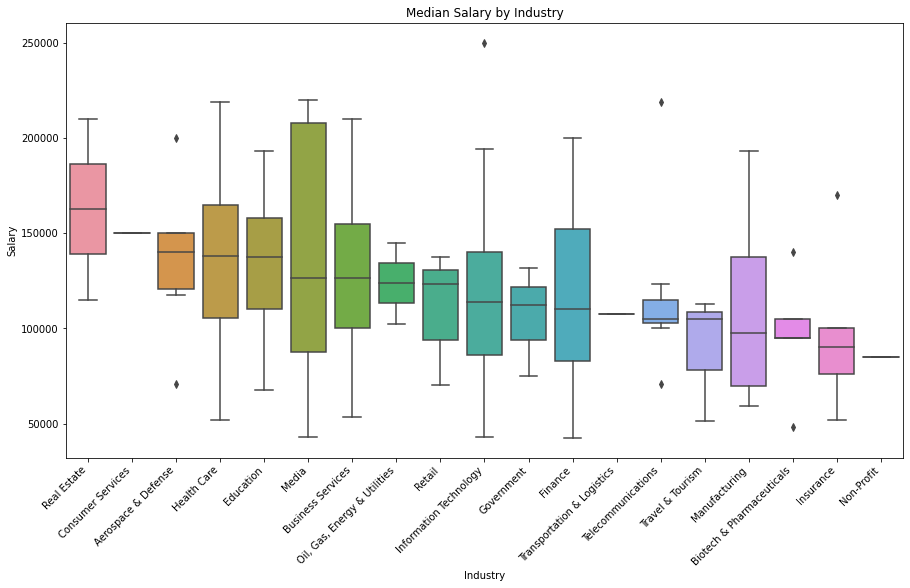

In [157]:
salary_not_null = df[df.SalaryMid.notnull()]

industry_salary=salary_not_null.groupby(['Industry'])['SalaryMid'].median().sort_values(ascending=False).index


plt.figure(figsize = (15,8))
sns.boxplot(x='Industry', y='SalaryMid', data = df, order=industry_salary)
plt.xlabel("Industry")
plt.ylabel("Salary")
plt.title("Median Salary by Industry")
plt.xticks(
    rotation=45, 
    horizontalalignment='right'  
)
plt.show()

In [21]:
df[(df.Industry=='Real Estate')&(df.SalaryMid.notnull())]

,Company,Rating,Role,Location,State,Salary,JobType,JobFunction,Industry,Size,url,Description,City,SalaryLow,SalaryHigh,SalaryMid
1123,Movoto,4.5,Senior Data Analyst,Remote,Remote,"$200,000 - $220,000",Full-time,data analyst,Real Estate,51 to 200 Employees,https://www.glassdoor.com/partner/jobListing.h...,Define problems and opportunities of current u...,Remote,200000.0,220000.0,210000.0
2026,Snapdocs,4.7,Data Scientist,"San Francisco, CA",CA,"$75,000 - $250,000",Full-time,data scientist,Real Estate,201 to 500 Employees,https://www.glassdoor.com/partner/jobListing.h...,"21 days of vacation Company subsidized health,...",San Francisco,75000.0,250000.0,162500.0
3066,CBRE,3.9,Data Scientist,"Richardson, TX",TX,"$100,000 - $130,000",Full-time,data scientist,Real Estate,10000+ Employees,https://www.glassdoor.com/partner/jobListing.h...,"\nBeing an Analytics-focused role, this job ma...",Richardson,100000.0,130000.0,115000.0


In [22]:
df[(df.Industry=='Consumer Services')&(df.SalaryMid.notnull())]

,Company,Rating,Role,Location,State,Salary,JobType,JobFunction,Industry,Size,url,Description,City,SalaryLow,SalaryHigh,SalaryMid
1372,Intelligent Automation,3.8,Research Data Scientist,"Rockville, MD",MD,"$150,000",Full-time,data scientist,Consumer Services,51 to 200 Employees,https://www.glassdoor.com/partner/jobListing.h...,Design and develop scalable machine learning a...,Rockville,150000.0,150000.0,150000.0


### Company

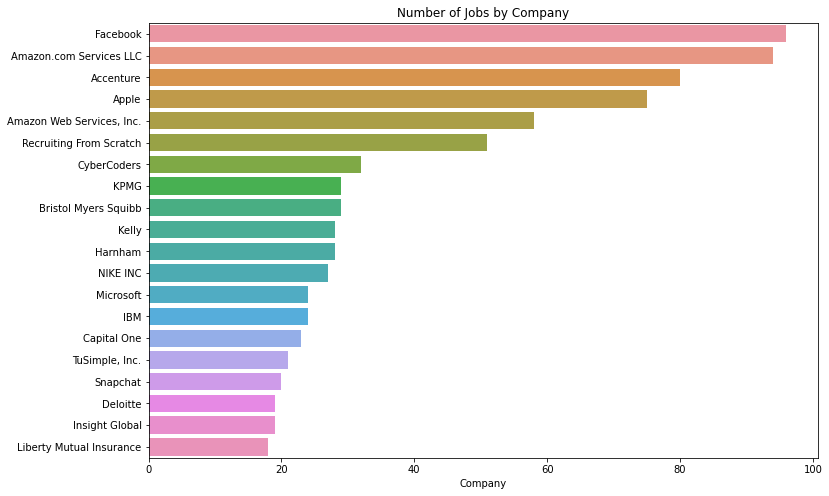

In [160]:
plt.figure(figsize = (12,8))
sns.barplot(x=df.Company.value_counts().values[:20], y=df.Company.value_counts().index[:20])
plt.title('Number of Jobs by Company')
plt.xlabel('Number of Jobs')
plt.xlabel('Company');

### Company Rating vs Salary

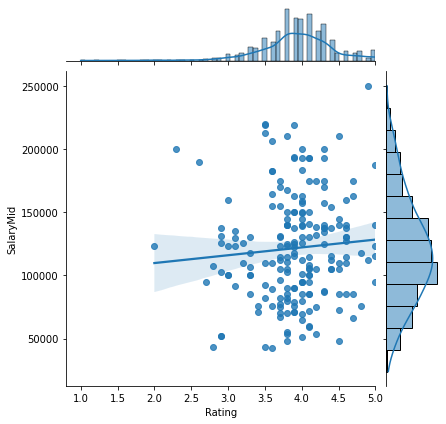

In [24]:
sns.jointplot(x='Rating', y='SalaryMid', data=df, kind="reg");

### Job Type

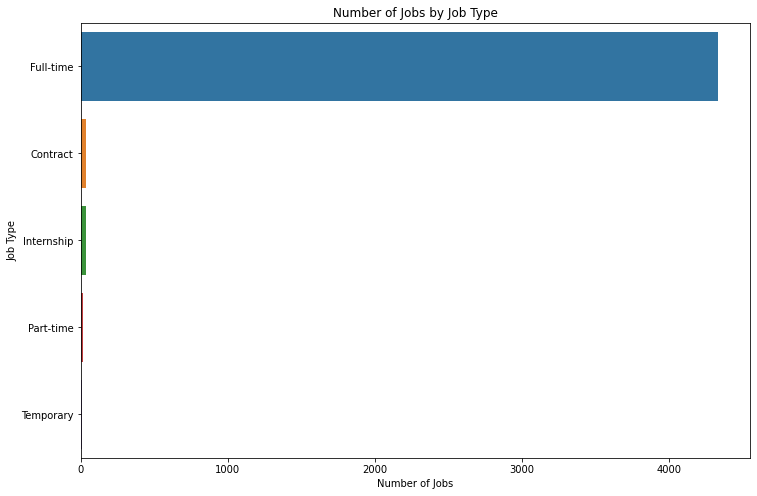

In [164]:
plt.figure(figsize = (12,8))
sns.barplot(x=df.JobType.value_counts(), y=df.JobType.value_counts().index) 
plt.title('Number of Jobs by Job Type')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Type');

### Job Functions

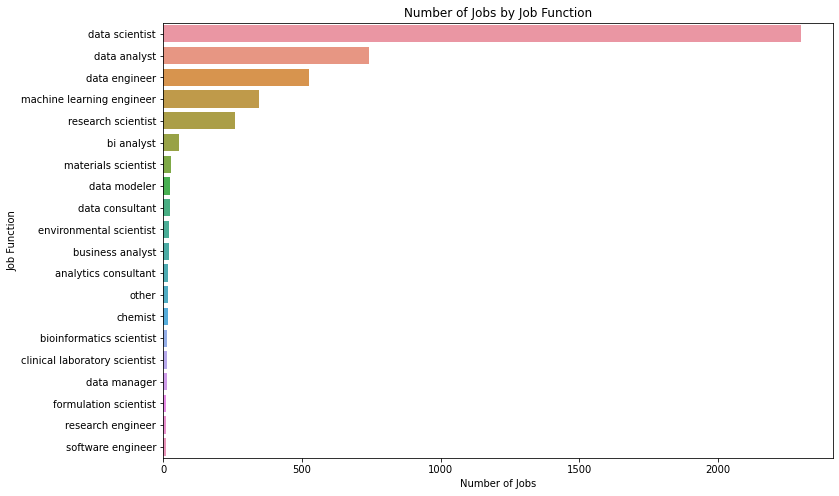

In [107]:
plt.figure(figsize = (12,8))
sns.barplot(x=df.JobFunction.value_counts().values[:20], y=df.JobFunction.value_counts().index[:20])
plt.title('Number of Jobs by Job Function')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Function');

### Education

In [165]:
desc_col = df["Description"]

bachelors = [re.findall("(?<![A-Z])B\.?S\.?c?(?![A-Z])|(?<![A-Z])B\.?A\.?(?![A-Z])|BACHELOR|UNDERGRAD.{0,40} DEGREE|ASSOCIATE'?S?.{20}DEGREE",i, re.IGNORECASE) for i in desc_col.values]
mba = [re.findall("([\s|-|/]MBA[\s|-|/]|[\s|-|/]MBUS[\s|-|/]|[\s|-|/]MBS[\s|-|/]|MASTERS? OF BUSINESS)",i,re.IGNORECASE) for i in desc_col.values]
masters = [re.findall("(MASTER'?S?.{0,40}DEGREE|GRADUATE.{0,40}DEGREE|(?<![A-Z])M\.?S\.?(?![A-Z]|\sDYNAMICS|,\sDSC)(?!-?~?\s?OFFICE|\sEXCEL|\sWORD|\sACCESS|-?\s?SQL)|ADVANCED?.{0,40}DEGREE|POST-?\s?GRADUATE)",i,re.IGNORECASE) for i in desc_col.values]
phd = [re.findall("(PH\.?D|ADVANCED?.{0,40}DEGREE|DOCTORA[TE|L]|POST-?\s?GRADUATE)",i,re.IGNORECASE) for i in desc_col.values]

df["Bachelor"] = [1 if x else 0 for x in bachelors]
df["MBA"] = [1 if x else 0 for x in mba]
df["Master"] = [1 if x else 0 for x in masters]
df["PhD"] = [1 if x else 0 for x in phd]

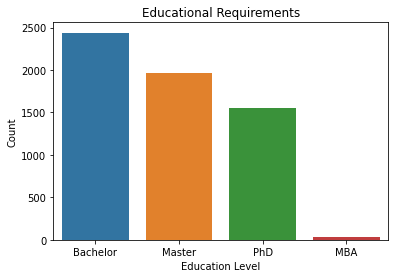

In [166]:
education_df = df[['Bachelor', 'MBA', 'Master', 'PhD']].stack().reset_index().rename(columns={'level_0': 'index', 'level_1': 'education', 0: 'value'})
ed_df = education_df.groupby(['education'])['value'].sum().reset_index().sort_values('value', ascending=False)

sns.barplot(data = ed_df, x='education', y='value')
plt.title('Educational Requirements')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

In [168]:
def only_bs(row):
    if (row['BS'] == 1) and (row['MS']==0) and (row['PhD'] == 0):
        val = 1
    else:
        val = 0
    return val

df['Bachelor only']=df.apply(only_bs, axis=1)

def only_ms(row):
    if (row['BS'] == 0) and (row['MS']==1) and (row['PhD'] == 0):
        val = 1
    else:
        val = 0
    return val
                                                
df['Master only']=df.apply(only_ms, axis=1)
                                                
def only_phd(row):
    if (row['BS'] == 0) and (row['MS']==0) and (row['PhD'] == 1):
        val = 1
    else:
        val = 0
    return val
df['PhD only']=df.apply(only_phd, axis=1)

def bs_ms(row):
    if (row['BS'] == 1) and (row['MS']==1) and (row['PhD'] == 0):
        val = 1
    else:
        val = 0
    return val
df['Bachelor/Master']=df.apply(bs_ms, axis=1)

def ms_phd(row):
    if (row['BS'] == 0) and (row['MS']==1) and (row['PhD'] == 1):
        val = 1
    else:
        val = 0
    return val
df['Master/PhD']=df.apply(ms_phd, axis=1)
                                                
def bs_ms_phd(row):
    if (row['BS'] == 1) and (row['MS']==1) and (row['PhD'] == 1):
        val = 1
    else:
        val = 0
    return val
df['Bachelor/Master/PhD']=df.apply(bs_ms_phd, axis=1)

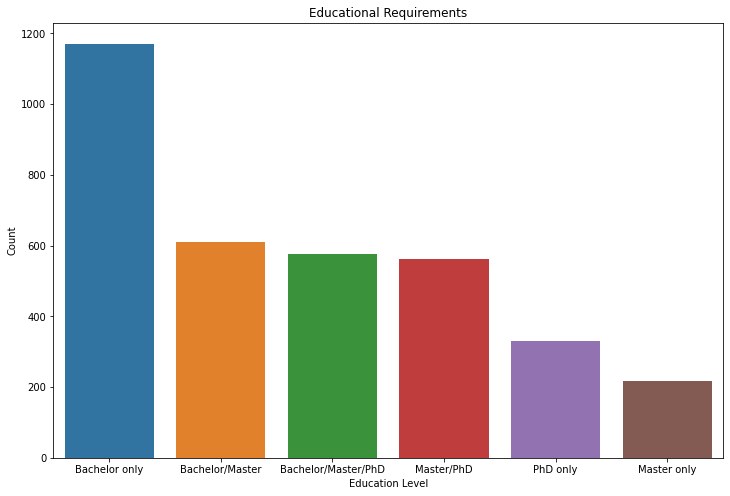

In [170]:
edu_df2 = df[['Bachelor only', 'Master only', 'PhD only', 'Bachelor/Master', 'Master/PhD', 'Bachelor/Master/PhD']].stack().reset_index().rename(columns={'level_0': 'index', 'level_1': 'education', 0: 'value'})
ed_df = edu_df2.groupby(['education'])['value'].sum().reset_index().sort_values('value', ascending=False)

plt.figure(figsize = (12,8))
sns.barplot(data = ed_df, x='education', y='value')
plt.title('Educational Requirements')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

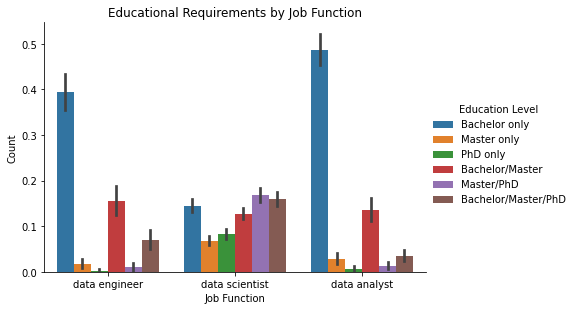

In [171]:
data_df = df[(df.JobFunction == 'data analyst') | (df.JobFunction == 'data engineer') | (df.JobFunction == 'data scientist')]
new_df = data_df[['JobFunction', 'Bachelor only', 'Master only', 'PhD only', 'Bachelor/Master', 'Master/PhD', 'Bachelor/Master/PhD']].melt(id_vars=['JobFunction'], value_vars=['Bachelor only', 'Master only', 'PhD only', 'Bachelor/Master', 'Master/PhD', 'Bachelor/Master/PhD'], var_name='Education Level', value_name='Count')

sns.catplot(data=new_df, kind='bar', x='JobFunction', y='Count', hue='Education Level', height=4, aspect=1.5)
plt.title('Educational Requirements by Job Function')
plt.xlabel('Job Function')
plt.show()

### Skills

In [31]:
python = [re.findall("PYTHON",i,re.IGNORECASE) for i in desc_col.values]
R = [re.findall("[\s,\.\-(\[\\\]R[\s,\.\-)\]\\\]",i,re.IGNORECASE) for i in desc_col.values]
SQL = [re.findall("SQL",i,re.IGNORECASE) for i in desc_col.values]
java = [re.findall("JAVA(?!SCRIPT)",i,re.IGNORECASE) for i in desc_col.values]
C = [re.findall("[\s,\.\-(\\\]C([\s,\.\-)\]\\\]|\+\+|SHARP)",i,re.IGNORECASE) for i in desc_col.values]
hadoop = [re.findall("HADOOP",i,re.IGNORECASE) for i in desc_col.values]
tensorflow = [re.findall("TENSORFLOW|TENSOR\s?FLOW",i,re.IGNORECASE) for i in desc_col.values]
spark = [re.findall("SPARK",i,re.IGNORECASE) for i in desc_col.values]
django = [re.findall("DJANGO",i,re.IGNORECASE) for i in desc_col.values]
excel = [re.findall("EXCEL[\s,\.\-)\]\\\)]", i) for i in desc_col.values]
access = [re.findall("ACCESS[\s,\.\-)\]\\\)]", i) for i in desc_col.values]
azure = [re.findall("AZURE", i) for i in desc_col.values]
git = [re.findall("GIT|GITHUB|GIT\sHUB",i,re.IGNORECASE) for i in desc_col.values]
sas = [re.findall("SAS", i) for i in desc_col.values]
keras = [re.findall("KERAS", i) for i in desc_col.values]
stata = [re.findall("STATA", i, re.IGNORECASE) for i in desc_col.values]
matlab = [re.findall("MATLAB", i, re.IGNORECASE) for i in desc_col.values]
docker = [re.findall("DOCKER", i, re.IGNORECASE) for i in desc_col.values]
scala = [re.findall("SCALA(?![A-Z])", i, re.IGNORECASE) for i in desc_col.values]
vba = [re.findall("VBA", i, re.IGNORECASE) for i in desc_col.values]
aws = [re.findall("AWS", i, re.IGNORECASE) for i in desc_col.values]
tableau = [re.findall("TABLEAU", i, re.IGNORECASE) for i in desc_col.values]
powerbi = [re.findall("POWERBI|POWER\s?BI", i, re.IGNORECASE) for i in desc_col.values]
ruby = [re.findall("RUBY", i, re.IGNORECASE) for i in desc_col.values]
html = [re.findall("HTML", i, re.IGNORECASE) for i in desc_col.values]
css = [re.findall("CSS", i, re.IGNORECASE) for i in desc_col.values]
javascript = [re.findall("JAVA-?\s?SCRIPT", i, re.IGNORECASE) for i in desc_col.values]
hive = [re.findall("(.{20})(?<!ARC)(HIVE)(.{20})",i,re.IGNORECASE) for i in desc_col.values]

df["Python"] = [1 if x else 0 for x in python]
df["R"] = [1 if x else 0 for x in R]
df["SQL"] = [1 if x else 0 for x in SQL]
df["Java"] = [1 if x else 0 for x in java]
df["C"] = [1 if x else 0 for x in C]
df["Hadoop"] = [1 if x else 0 for x in hadoop]
df["TensorFlow"] = [1 if x else 0 for x in tensorflow]
df["Spark"] = [1 if x else 0 for x in spark]
df["Django"] = [1 if x else 0 for x in django]
df["Excel"] = [1 if x else 0 for x in excel]
df["Access"] = [1 if x else 0 for x in access]
df["Azure"] = [1 if x else 0 for x in azure]
df["Git/GitHub"] = [1 if x else 0 for x in git]
df["SAS"] = [1 if x else 0 for x in sas]
df["Keras"] = [1 if x else 0 for x in keras]
df["Stata"] = [1 if x else 0 for x in stata]
df["MatLab"] = [1 if x else 0 for x in matlab]
df["Docker"] = [1 if x else 0 for x in docker]
df["Scala"] = [1 if x else 0 for x in scala]
df["VBA"] = [1 if x else 0 for x in vba]
df["AWS"] = [1 if x else 0 for x in aws]
df["Tableau"] = [1 if x else 0 for x in tableau]
df["PowerBI"] = [1 if x else 0 for x in powerbi]
df["Ruby"] = [1 if x else 0 for x in ruby]
df["HTML"] = [1 if x else 0 for x in html]
df["CSS"] = [1 if x else 0 for x in css]
df["Javascript"] = [1 if x else 0 for x in javascript]
df["Hive"] = [1 if x else 0 for x in hive]

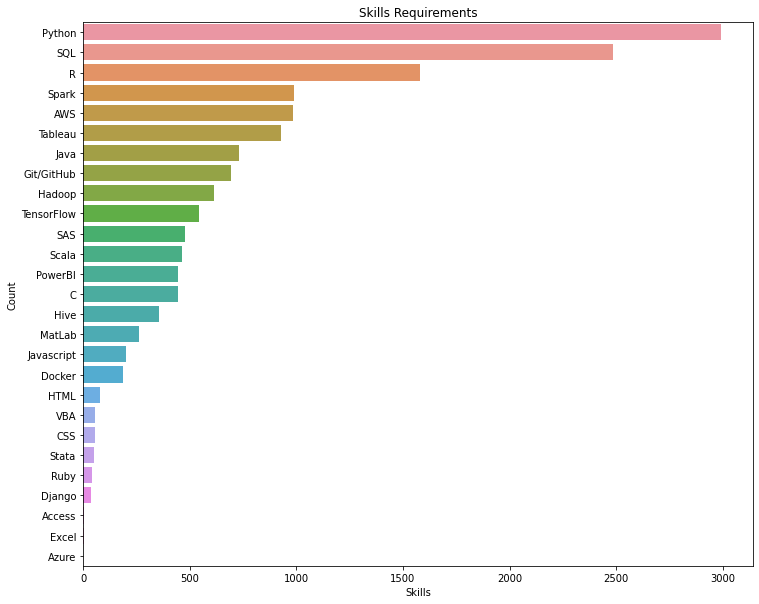

In [140]:
skills_df = df[['Python', 'R', 'SQL', 'Java', 'C', 'Hadoop', 'TensorFlow', 'Spark', 'Django', 'Excel', 'Access', 'Azure', 'Git/GitHub', 'SAS', 'Keras', 'Stata', 'MatLab', 'Docker', 'Scala', 'VBA', 'AWS', 'Tableau', 'PowerBI', 'Ruby', 'HTML', 'CSS', 'Javascript', 'Hive']].stack().reset_index().rename(columns={'level_0': 'index', 'level_1': 'skill', 0: 'value'})
sk_df = skills_df.groupby(['skill'])['value'].sum().reset_index().sort_values('value', ascending=False)
sk_df= sk_df.loc[(sk_df.sum(axis=1) != 0), (sk_df.sum(axis=0) != 0)]

plt.figure(figsize = (12,10))
sns.barplot(data = sk_df, y='skill', x='value')
plt.title('Skills Requirements')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()

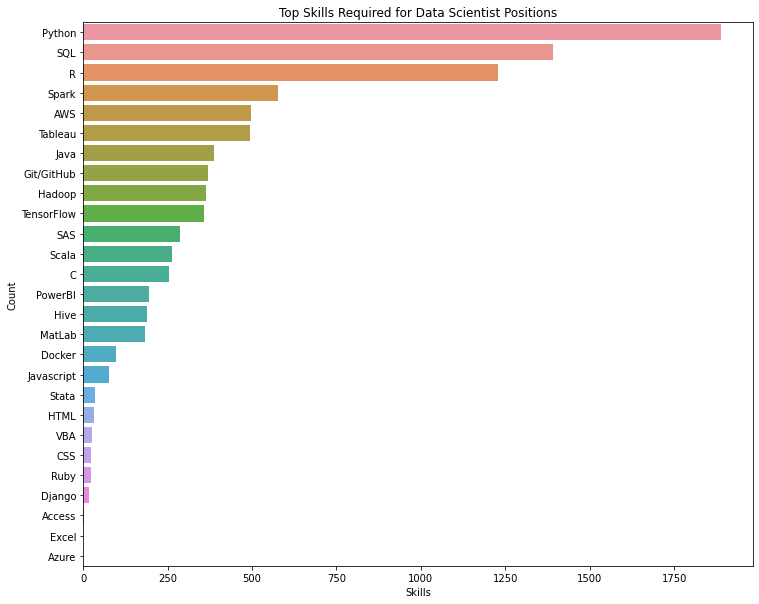

In [139]:
ds_df = df[(df.JobFunction == 'data scientist')][['JobFunction', 'Python', 'R', 'SQL', 'Java', 'C', 'Hadoop', 'TensorFlow', 'Spark', 'Django', 'Excel', 'Access', 'Azure', 'Git/GitHub', 'SAS', 'Keras', 'Stata', 'MatLab', 'Docker', 'Scala', 'VBA', 'AWS', 'Tableau', 'PowerBI', 'Ruby', 'HTML', 'CSS', 'Javascript', 'Hive']].melt(id_vars=['JobFunction'], value_vars=['Python', 'R', 'SQL', 'Java', 'C', 'Hadoop', 'TensorFlow', 'Spark', 'Django', 'Excel', 'Access', 'Azure', 'Git/GitHub', 'SAS', 'Keras', 'Stata', 'MatLab', 'Docker', 'Scala', 'VBA', 'AWS', 'Tableau', 'PowerBI', 'Ruby', 'HTML', 'CSS', 'Javascript', 'Hive'], var_name='Skill', value_name='Count')
sk_df = ds_df.groupby(['Skill'])['Count'].sum().reset_index().sort_values('Count', ascending=False)
sk_df = sk_df.loc[(sk_df.sum(axis=1) != 0), (sk_df.sum(axis=0) != 0)]

plt.figure(figsize=(12,10))
sns.barplot(data = sk_df, y='Skill', x='Count')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top Skills Required for Data Scientist Positions')
plt.show()

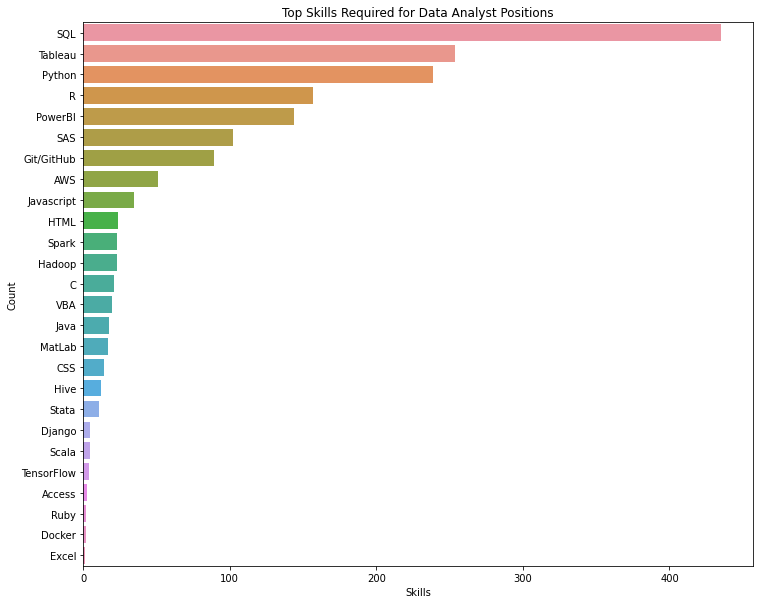

In [138]:
da_df = df[(df.JobFunction == 'data analyst')][['JobFunction', 'Python', 'R', 'SQL', 'Java', 'C', 'Hadoop', 'TensorFlow', 'Spark', 'Django', 'Excel', 'Access', 'Azure', 'Git/GitHub', 'SAS', 'Keras', 'Stata', 'MatLab', 'Docker', 'Scala', 'VBA', 'AWS', 'Tableau', 'PowerBI', 'Ruby', 'HTML', 'CSS', 'Javascript', 'Hive']].melt(id_vars=['JobFunction'], value_vars=['Python', 'R', 'SQL', 'Java', 'C', 'Hadoop', 'TensorFlow', 'Spark', 'Django', 'Excel', 'Access', 'Azure', 'Git/GitHub', 'SAS', 'Keras', 'Stata', 'MatLab', 'Docker', 'Scala', 'VBA', 'AWS', 'Tableau', 'PowerBI', 'Ruby', 'HTML', 'CSS', 'Javascript', 'Hive'], var_name='Skill', value_name='Count')

sk_df = da_df.groupby(['Skill'])['Count'].sum().reset_index().sort_values('Count', ascending=False)
sk_df = sk_df.loc[(sk_df.sum(axis=1) != 0), (sk_df.sum(axis=0) != 0)]

plt.figure(figsize=(12,10))
sns.barplot(data = sk_df, y='Skill', x='Count')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top Skills Required for Data Analyst Positions')
plt.show()

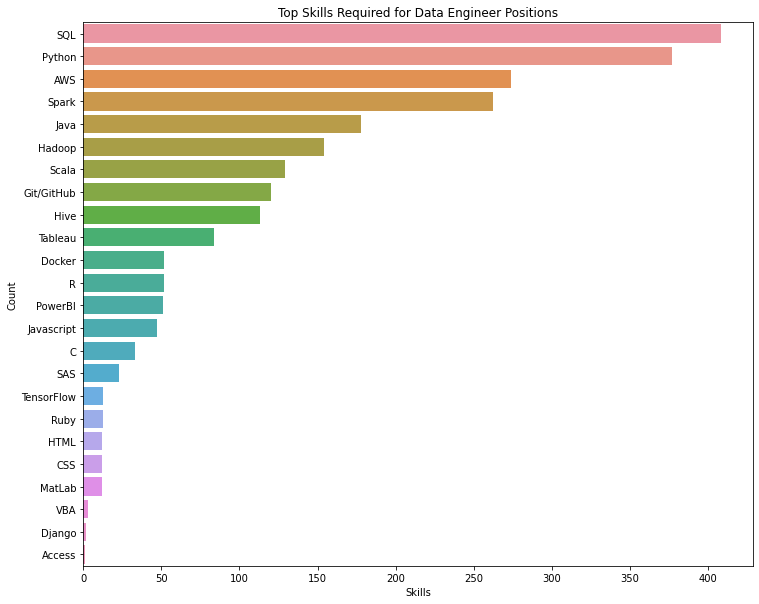

In [137]:
de_df = df[(df.JobFunction == 'data engineer')][['JobFunction', 'Python', 'R', 'SQL', 'Java', 'C', 'Hadoop', 'TensorFlow', 'Spark', 'Django', 'Excel', 'Access', 'Azure', 'Git/GitHub', 'SAS', 'Keras', 'Stata', 'MatLab', 'Docker', 'Scala', 'VBA', 'AWS', 'Tableau', 'PowerBI', 'Ruby', 'HTML', 'CSS', 'Javascript', 'Hive']].melt(id_vars=['JobFunction'], value_vars=['Python', 'R', 'SQL', 'Java', 'C', 'Hadoop', 'TensorFlow', 'Spark', 'Django', 'Excel', 'Access', 'Azure', 'Git/GitHub', 'SAS', 'Keras', 'Stata', 'MatLab', 'Docker', 'Scala', 'VBA', 'AWS', 'Tableau', 'PowerBI', 'Ruby', 'HTML', 'CSS', 'Javascript', 'Hive'], var_name='Skill', value_name='Count')

sk_df = de_df.groupby(['Skill'])['Count'].sum().reset_index().sort_values('Count', ascending=False)
sk_df = sk_df.loc[(sk_df.sum(axis=1) != 0), (sk_df.sum(axis=0) != 0)]

plt.figure(figsize=(12,10))
sns.barplot(data = sk_df, y='Skill', x='Count')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top Skills Required for Data Engineer Positions')
plt.show()

## Conclusion
From the data, it can be observed that there are many jobs available and regardless of which state one works in, the average salary for data science-related jobs are almost or over 100k. For me personally, I live in Los Angeles  and even though California has the most available jobs, they are spread between both Northern and Southern California. Thus if I wanted to increase my chances of getting hired, I would most likely have to apply and consider moving to San Francisco, San Jose, and San Diego. Additionally, for those that live in New York in cities outside of New York City, their only options are New York City or jersey City if they wish to stay close to home. 
In addition, the industry in the popular states are focused on I.T., so if I wanted to enter the healthcare industry, I should consider widening my scope to other states such as Colorodo, Massachussetts, or Minnesota. 

## Future Works
One limitation of this analysis was that I did not have any historical data. It will be interesting to gather more data in future and analyze other factors such as how long it takes for a positions get filled, what are the best days of week or even month to look for a position, or changes in salary. 
It would also add to my data if I scraped other popular websites for job-seekers such as Indeed, LinkedIn, Ziprecruiter as it may have postings that Glassdoor does not have. 
This analysis can also lead to interesting machine learning projects, such as a recommendation system for which jobs to apply to based on location, salary desire, skills, education, and work experience.